# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [12]:
from sklearn.metrics.pairwise import pairwise_distances
A = pairwise_distances(raitings, metric='cosine')
A

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [35]:
i = 0
for x in A:
    tmp_n = list(x).index(min(x[np.nonzero(x)]))
    print(i, tmp_n)
    i += 1

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2



b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(raitings)

PCA(n_components=5)

In [41]:
pca.transform(raitings)

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [42]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, random_state=42)
svd.fit(raitings)

TruncatedSVD(n_components=5, random_state=42)

In [43]:
svd.transform(raitings)

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [58]:
def  f(x): 
    return np.tan(np.sin(x)+np.cos(2*x+3))**2

In [60]:
from scipy.misc import derivative
derivative(f, 1, dx=1e-6)

55.3859176464222

In [93]:
from sympy import diff, symbols, cos, sin, tan
x = symbols('x')
diff(tan(sin(x) + cos(2*x+3))**2)

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [103]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [104]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [105]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

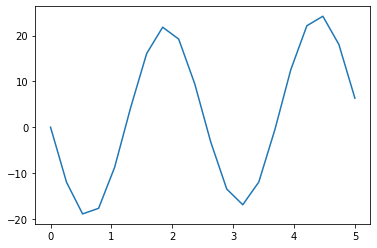

In [106]:
plt.plot(x, fx)
plt.show()

In [107]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [109]:
from scipy.optimize import minimize
res = minimize(error, [0,0],  method='COBYLA')
res

     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [130]:
n = 50 # размер выборок
a = [] # переменная для сохранения средних по выборкам

for num in range(1000):
    sample = [] # переменная для сохранения выборок
    for i in range(n):
        sample.append(np.random.randint(0,20,1000))
    sample = np.array(sample) # задаем массив
    a = np.append(a, sample.mean()) #вычисляем и добавляем среднее по выборкам
a

array([9.51134, 9.53088, 9.51424, 9.52434, 9.47576, 9.52896, 9.47318,
       9.51786, 9.51146, 9.50828, 9.48974, 9.55358, 9.48604, 9.47168,
       9.51772, 9.51132, 9.50232, 9.4618 , 9.46674, 9.46488, 9.51818,
       9.54302, 9.47914, 9.53318, 9.48742, 9.50784, 9.48022, 9.50404,
       9.48432, 9.4977 , 9.51164, 9.49428, 9.46718, 9.49434, 9.48762,
       9.4892 , 9.49326, 9.52784, 9.52134, 9.51946, 9.54718, 9.52688,
       9.43904, 9.46038, 9.52894, 9.50422, 9.52364, 9.48458, 9.46742,
       9.51238, 9.53084, 9.49142, 9.4534 , 9.50442, 9.54502, 9.52344,
       9.48672, 9.51164, 9.4835 , 9.53656, 9.50476, 9.52168, 9.47062,
       9.48472, 9.49638, 9.4962 , 9.48692, 9.555  , 9.51706, 9.50936,
       9.508  , 9.50002, 9.49932, 9.51276, 9.47998, 9.50288, 9.50638,
       9.51388, 9.53048, 9.48636, 9.52674, 9.56126, 9.48642, 9.46368,
       9.4797 , 9.49988, 9.51542, 9.5049 , 9.46814, 9.523  , 9.48144,
       9.49772, 9.508  , 9.53154, 9.48492, 9.47852, 9.53132, 9.47882,
       9.48288, 9.47

Text(0.5, 0, 'x')

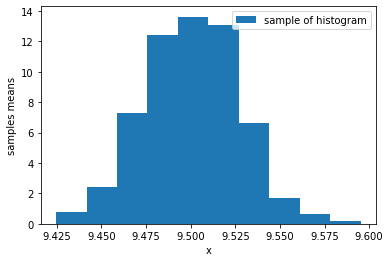

In [134]:
import matplotlib.pyplot as plt
label_1 = 'sample of histogram'
plt.hist(a, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('x')

### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [135]:
m = np.array([[1, 4], [1, 1]])
m

array([[1, 4],
       [1, 1]])

In [136]:
from numpy import linalg as LA
w,v = LA.eig(m)
print(f'Собственные значения вектора m {w}')
print(f'Собственные вектора вектора m {v}')

Собственные значения вектора m [ 3. -1.]
Собственные вектора вектора m [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


In [141]:
#  |A-λ*I|=0
# |A-λ*I|=|{{1-λ, 4}, {1, 1-λ}}|
l = symbol('l')
discr = l **2 -2*l - 3
a=1
b=-2
c=-3
discr_ =16

TypeError: 'DeprecatedImportModule' object is not callable

#### собственный вектор
|A-λ*I|=0 = |{{1-λ, 4}, {1, 1-λ}}|

|A-λ*I|=|{{1-λ, 4}, {1, 1-λ}}|=λ^2-2*λ-3

a=1, b=-2, c=-3

discr = b**2 - 4ac = (-2)**2 - 4*(-3) = 16

x1= 2 +4/2 = 3

x2= 2-4/2 = -1

#### собственные значения
для х1=3

A = ({1-3, 1}, {4, 1-3})

x1-2*x2=0

x1=2*x2

x2=x2=2

для х2=-1

A = {1-(-1), 1}, {4, 1-(-1)}

x1+2*x2=0

x1=-2*x2

x2=x2=1

x1=-2